In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pyvttbl import DataFrame
from pyvttbl.stats import Anova
import os

In [4]:
##### SET STUDY VARIABLES
## Between-factors >> group on....
# Dep: Exptertise, FATR: Study
human = False
human = True

FATR = False
FATR = True



if FATR:
    print("** FATR Study **")
    source = os.path.join("data","fatr_students.csv")
    bfactor = "Study"
else:
    print("** Depend Study **")
    source = os.path.join("data","depend_only.csv")
    bfactor = "Expertise"


temp_csv_path = 'temp_cleaned_data.csv'

## Set DVs >> process multiple in one script, or just one at a time; 
dv_cols = ['NasaTLX','Decision','Diagnosis Time','Cooper Harper']
dv_cols = ['Cooper Harper']  
dv_cols = ['NasaTLX']
dv_cols = ['Diagnosis Time']  
dv_cols = ['Decision']

# Create a pyvttbl.DataFrame from the cleaned pandas DataFrame
df = DataFrame()
df_pandas = pd.read_csv(source)

# Calculate NasaTLX if this is the DV for analysis
if dv_cols[0] != "NasaTLX":
    ## Drop rows with missing values in relevant columns
    # CAUTION! If dv_cols list contains multiple columns, then columns missing row values will obliterate other columns' row values
    df_pandas = df_pandas.dropna(subset=dv_cols)
    temp_csv_path = 'temp_cleaned_data.csv'
    df_pandas.to_csv(temp_csv_path, index=False)
else:
    print("create NasaTLX composit measure...")
    # Invert 'Performance' scores
    df_pandas['Performance'] = 11 - df_pandas['Performance']
    columns = ['Performance', 'Temporal Demand', 'Frustration Level', 'Mental Demand', 'Effort']
    for column in columns:
        median = df_pandas[column].median()
        df_pandas[column].fillna(median)
    # Calculate the NasaTLX composite score
    df_pandas['NasaTLX'] = df_pandas[columns].mean(axis=1)
    df_pandas.to_csv(temp_csv_path, index=False)

df.read_tbl(temp_csv_path)


    
for dv in dv_cols:
    print(f"Running ANOVA for: {dv}")
    
    aov = Anova()
    aov.run(df, dv, wfactors=['Scenario', 'Fault'], bfactors=[bfactor])   
    aov.truncate(test='gg')

    if human:
        ### HUMAN READABLE
        print(aov)
        print("\n\n") # this puts spaces between reports when running multiples
    else:
        ### For the Robots
        print(dict(aov))
        print("\n\n") 
    
        marginal_means = aov.get_marginal_means(['Scenario', 'Fault', bfactor])
        print(f"Marginal Means for: {dv}")
        print(marginal_means)
        print("\n\n") 



** FATR Study **
Running ANOVA for: Decision
('Scenario',)
('Study',)
('Fault', 'Study')
('Scenario', 'Fault', 'Study')
Decision ~ Scenario * Fault * Study

TESTS OF BETWEEN-SUBJECTS EFFECTS

Measure: Decision - No Significant Effects or Interactions


TESTS OF WITHIN SUBJECTS EFFECTS

Measure: Decision
     Source                             Type III   eps   df    MS       F      Sig.    et2_G   Obs.    SE     95% CI   lambda   Obs.  
                                           SS                                                                                   Power 
Scenario * Study   Greenhouse-Geisser      0.667     1    1   0.667    5.966   0.023   0.050     24   0.072    0.142    6.508   0.684 
-------------------------------------------------------------------------------------------------------------------------------------
Error(Scenario)    Greenhouse-Geisser      2.458     1   22   0.112                                                                   
---------------------

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


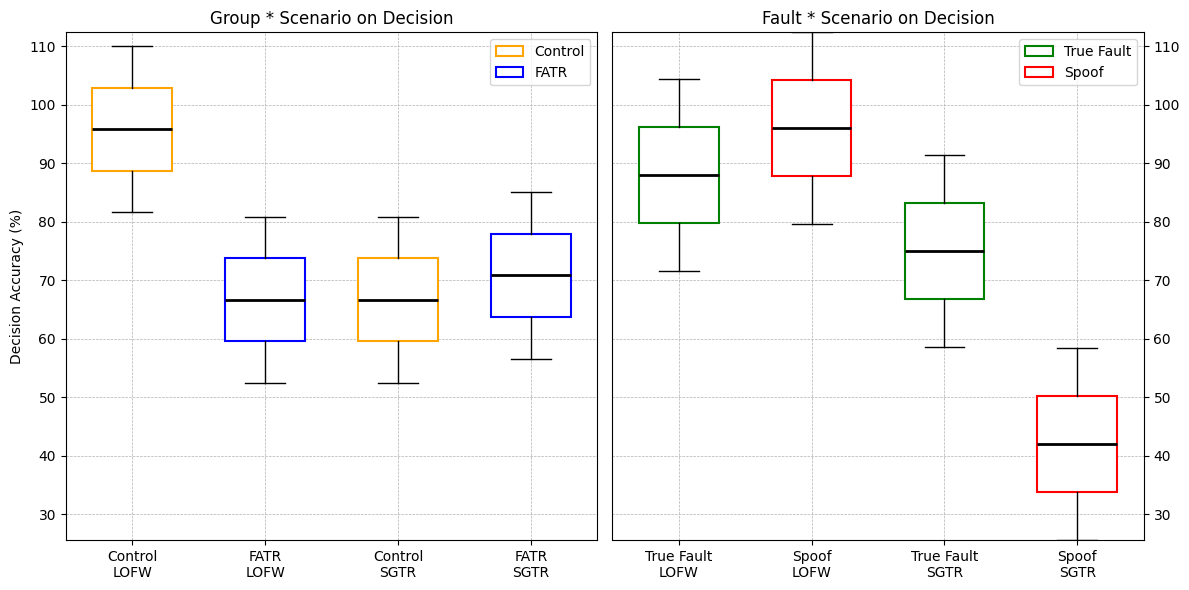

In [14]:
import matplotlib.pyplot as plt

# Title and filename setup
title = 'Interaction between Study on Decision'
tit0 = 'Group * Scenario on Decision'
y0 = 'Marginal Mean Decision'
x0 = 'Scenario'

tit1 = 'Fault * Scenario on Decision'
y1 = 'Mean Diag. Time'
x1 = 'Scenario'

# Data for 0
# iv0: control, FATR
#IV #, level, plot
x_levels_0 = ['LOFW', 'SGTR']
label_0 = ['Control', 'FATR']
iv00m_0 = [0.95833333, 0.66666667]
iv01m_0 = [0.66666667, 0.70833333]
iv00me_0 = [0.142 , 0.142 ]
iv01me_0 = [0.142 , 0.142 ]
# scenarios = ['LOFW', 'SGTR']
# dependency_means = [0.95833333, 0.66666667]
# fatr_means = [0.66666667, 0.70833333]
# dependency_errors = [0.04166667, 0.09829464]
# fatr_errors = [0.09829464, 0.09477599]

# Data for 1
x_levels_1 = ['LOFW', 'SGTR']
label_1 = ['True Fault', 'Spoof']
iv00m_1 = [0.88, 0.75]
iv01m_1 = [0.96, 0.42]
iv00me_1 = [0.164, 0.164]
iv01me_1 = [0.164, 0.164]

filename = title.replace(' ', '_') + '.png'
filename2 = title.replace(' ', '_') + '.eps'

# Creating a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns subplot, adjusted figsize

# ---- Left Plot: ----
data_0 = [
    [iv00m_0[0] - iv00me_0[0], iv00m_0[0] + iv00me_0[0]],
    [iv01m_0[0] - iv01me_0[0], iv01m_0[0] + iv01me_0[0]],
    [iv00m_0[1] - iv00me_0[1], iv00m_0[1] + iv00me_0[1]],
    [iv01m_0[1] - iv01me_0[1], iv01m_0[1] + iv01me_0[1]]
]


data_0 = np.array(data_0) * 100  # Convert to percentage
positions_0 = [0, 1, 2, 3]
labels_0 = [f'{label_0[0]}\n{x_levels_0[0]}', f'{label_0[1]}\n{x_levels_0[0]}', f'{label_0[0]}\n{x_levels_0[1]}', f'{label_0[1]}\n{x_levels_0[1]}']
colors_0 = ['orange', 'blue', 'orange', 'blue']  # Assign colors based on labels
bp0 = axs[0].boxplot(data_0.T, positions=positions_0, widths=0.6, patch_artist=True)
for box, color in zip(bp0['boxes'], colors_0):
    box.set(color=color, facecolor='white', linewidth=1.5)
for median in bp0['medians']:
    median.set(color='black', linewidth=2)    
axs[0].set_xticks(positions_0)
axs[0].set_xticklabels(labels_0)

axs[0].set_title(tit0)
axs[0].set_ylabel("Decision Accuracy (%)")
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)

axs[0].legend([bp0['boxes'][0], bp0['boxes'][1]], [label_0[0], label_0[1]], loc='upper right')

# ---- Right Plot: ----
data_1 = [
    [iv00m_1[0] - iv00me_1[0], iv00m_1[0] + iv00me_1[0]],
    [iv01m_1[0] - iv01me_1[0], iv01m_1[0] + iv01me_1[0]],
    [iv00m_1[1] - iv00me_1[1], iv00m_1[1] + iv00me_1[1]],
    [iv01m_1[1] - iv01me_1[1], iv01m_1[1] + iv01me_1[1]]
]
data_1 = np.array(data_1) * 100  # Convert to percentage
positions_1 = [0, 1, 2, 3]
labels_1 = [f'{label_1[0]}\n{x_levels_1[0]}', f'{label_1[1]}\n{x_levels_1[0]}', f'{label_1[0]}\n{x_levels_1[1]}', f'{label_1[1]}\n{x_levels_1[1]}']
colors_1 = ['green', 'red', 'green', 'red']  # Assign colors based on labels
bp1 = axs[1].boxplot(data_1.T, positions=positions_1, widths=0.6, patch_artist=True)

for box, color in zip(bp1['boxes'], colors_1):
    box.set(color=color, facecolor='white', linewidth=1.5)

for median in bp1['medians']:
    median.set(color='black', linewidth=2)
axs[1].set_xticks(positions_1)
axs[1].set_xticklabels(labels_1)

axs[1].set_title(tit1)
axs[1].set_ylabel("")
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)
axs[1].yaxis.tick_right()  # Move y-axis scale to the right
axs[1].yaxis.set_label_position("right")  # Move y-axis label to the right

axs[1].legend([bp1['boxes'][0], bp1['boxes'][1]], [label_1[0], label_1[1]], loc='upper right')

# Normalize the scale for both plots
all_data = np.concatenate((data_0, data_1))
min_val = np.min(all_data)
max_val = np.max(all_data)
axs[0].set_ylim(min_val, max_val)
axs[1].set_ylim(min_val, max_val)

# Assuming count is the total number of subplots
# ... (keep the existing code for adjusting spine color and linewidth)

# Save the figure as an EPS file
plt.tight_layout()
plt.savefig(filename2, format='eps')
plt.savefig(filename, format='png')
plt.show()